In [56]:
import time
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
company_dict = {}
def get_company_dataframes(file):
    line_count = 0
    abandon_count = 0
    result_list = []
    with open(file, 'r') as raw_data:
        while True:
            line = raw_data.readline()
            if not line:
                break
            if line_count % 100 == 0:
                print(line_count, datetime.datetime.now())
            line_count += 1
            json_data = json.loads(line)
            name = json_data['company']
            d = {'neg_abstract': json_data['score_abstract']['neg'],\
                 'pos_abstract': json_data['score_abstract']['pos'],\
                 'neu_abstract': json_data['score_abstract']['neu'],\
                 'neg_text': json_data['score_text']['neg'],\
                 'pos_text': json_data['score_text']['pos'],\
                 'neu_text': json_data['score_text']['neu'],\
                 'neg_sentence': json_data['score_sentence']['neg'],\
                 'pos_sentence': json_data['score_sentence']['pos'],\
                 'neu_sentence': json_data['score_sentence']['neu'],\
                 'date': json_data['date']}
            if name not in company_dict:
                company_dict[name] = pd.DataFrame([d])
            else:
                df = pd.DataFrame([d])
                company_dict[name] = company_dict[name].append(df, ignore_index=True)

In [59]:
get_company__dataframes('688v42.dat')

0 2018-05-08 22:41:36.223441
100 2018-05-08 22:41:36.656265
200 2018-05-08 22:41:36.954798
300 2018-05-08 22:41:37.333576
400 2018-05-08 22:41:37.606931
500 2018-05-08 22:41:37.868709
600 2018-05-08 22:41:38.139150
700 2018-05-08 22:41:38.340969
800 2018-05-08 22:41:38.623221
900 2018-05-08 22:41:38.962450
1000 2018-05-08 22:41:39.301110
1100 2018-05-08 22:41:39.667411
1200 2018-05-08 22:41:39.925134
1300 2018-05-08 22:41:40.294103
1400 2018-05-08 22:41:40.620493
1500 2018-05-08 22:41:40.873991
1600 2018-05-08 22:41:41.125917
1700 2018-05-08 22:41:41.390298
1800 2018-05-08 22:41:41.715134
1900 2018-05-08 22:41:42.005335
2000 2018-05-08 22:41:42.241774
2100 2018-05-08 22:41:42.471237
2200 2018-05-08 22:41:42.719014
2300 2018-05-08 22:41:42.965049
2400 2018-05-08 22:41:43.240480
2500 2018-05-08 22:41:43.460564
2600 2018-05-08 22:41:43.687858
2700 2018-05-08 22:41:43.905055
2800 2018-05-08 22:41:44.158869
2900 2018-05-08 22:41:44.514860
3000 2018-05-08 22:41:44.895745
3100 2018-05-08 22:4

2080


/Applications/anaconda/envs/acc/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: 

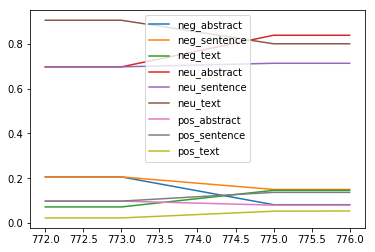

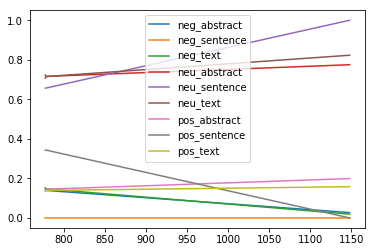

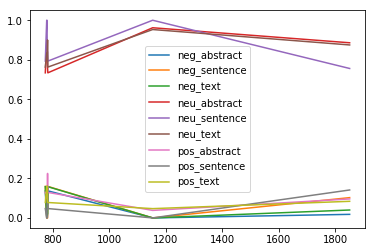

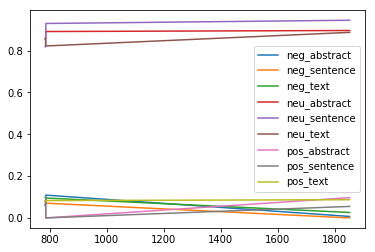

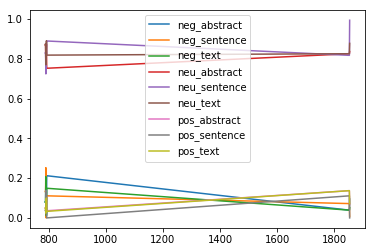

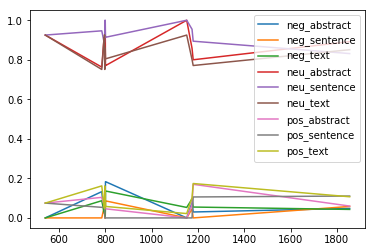

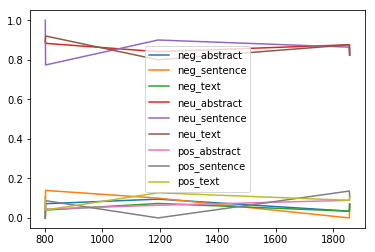

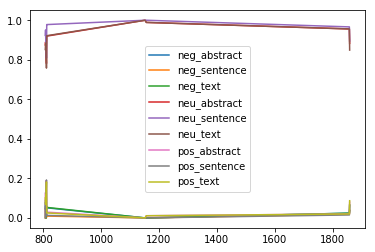

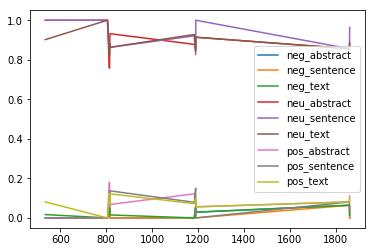

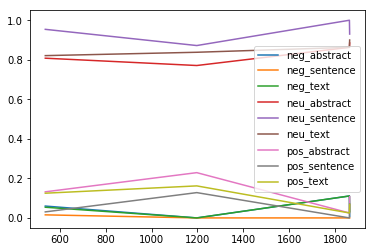

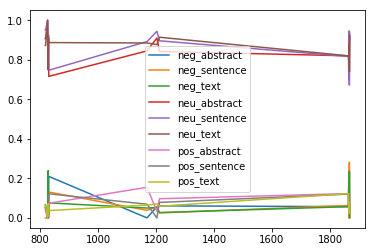

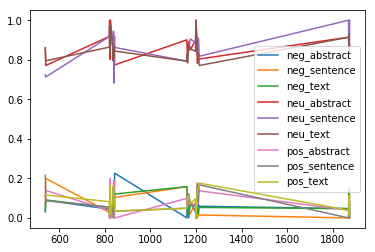

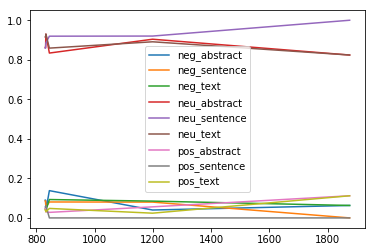

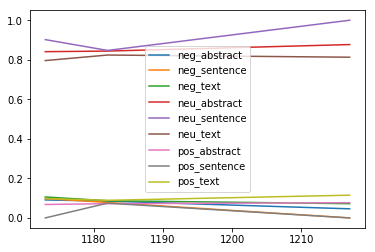

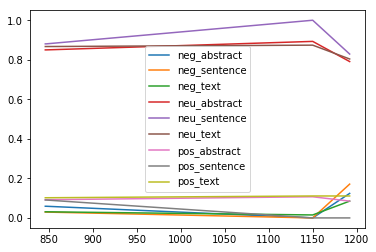

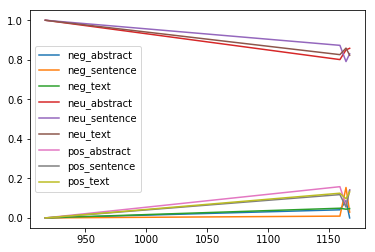

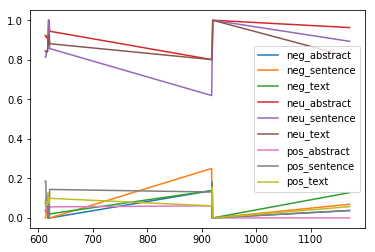

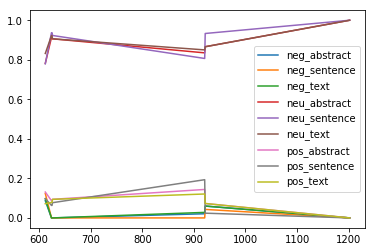

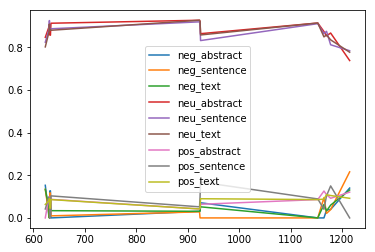

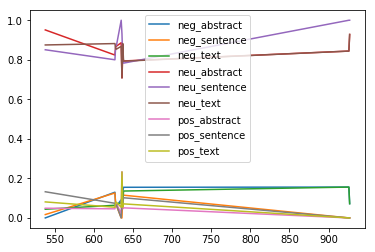

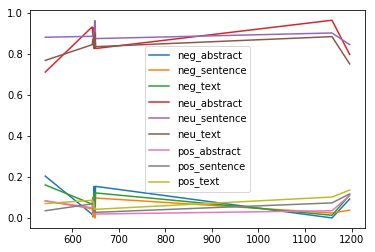

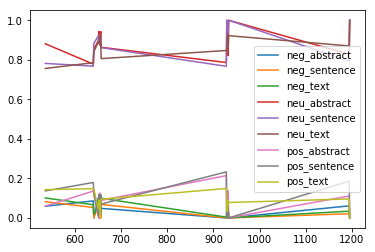

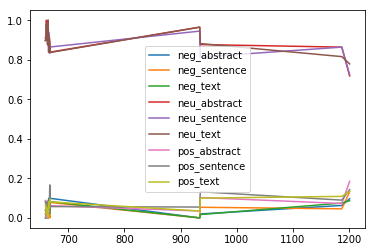

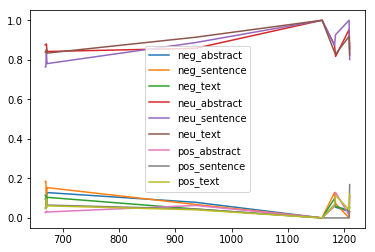

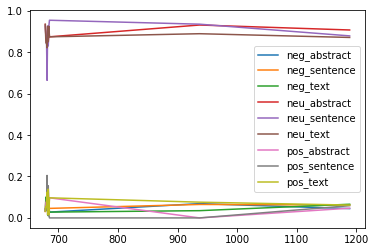

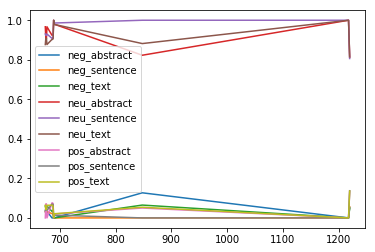

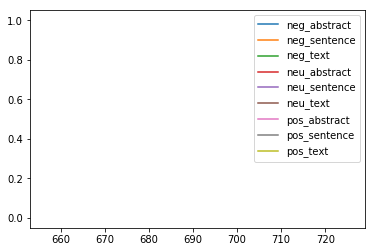

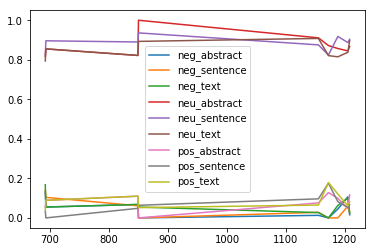

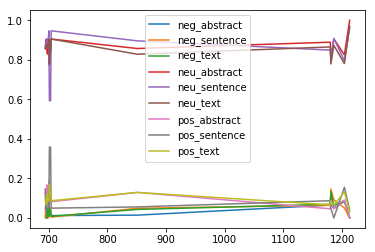

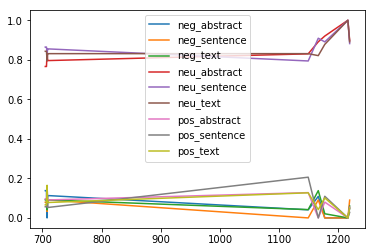

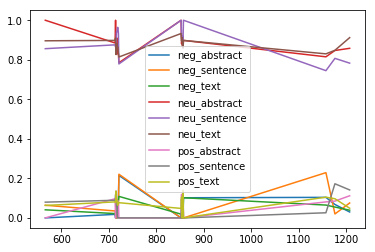

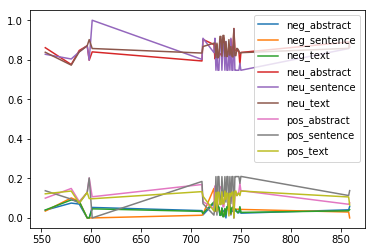

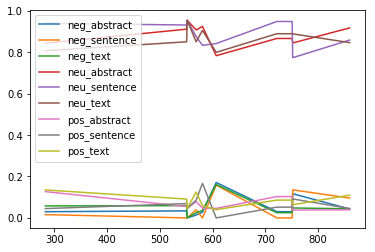

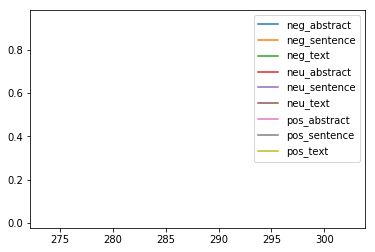

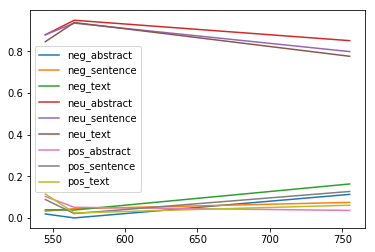

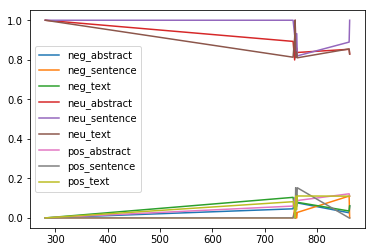

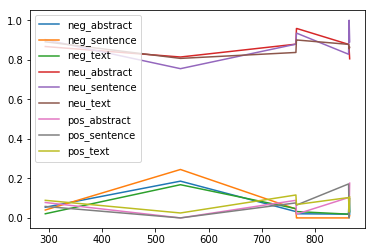

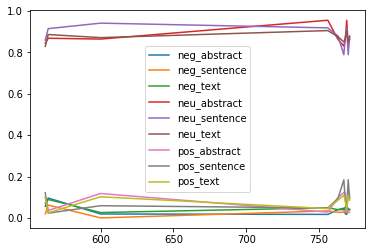

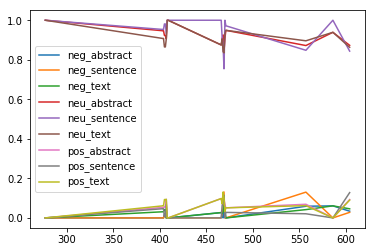

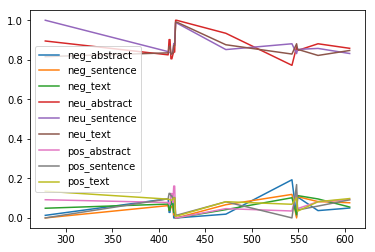

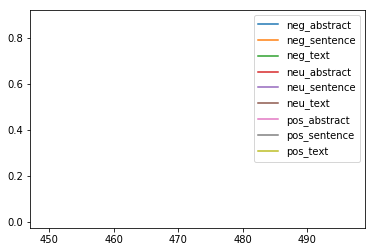

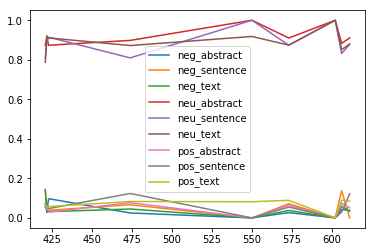

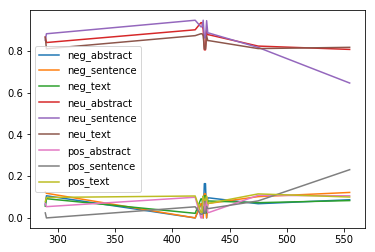

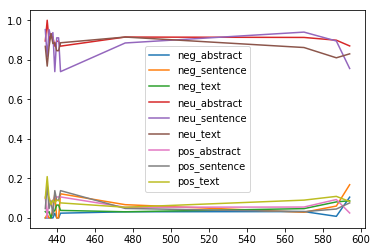

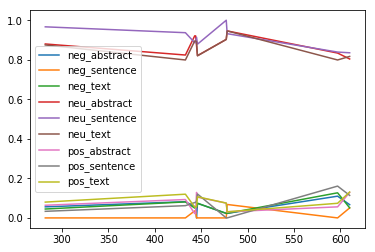

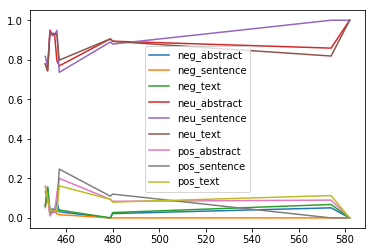

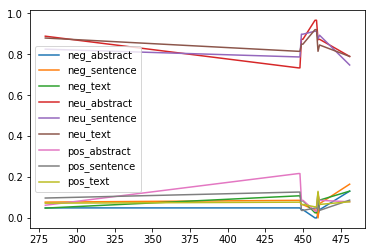

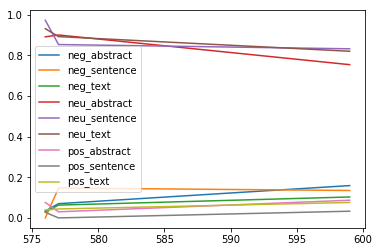

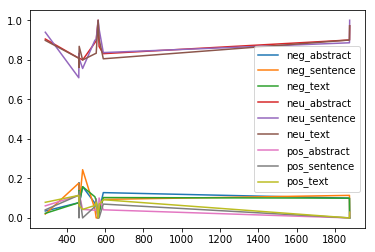

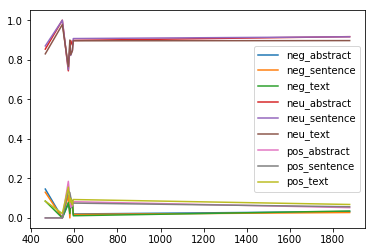

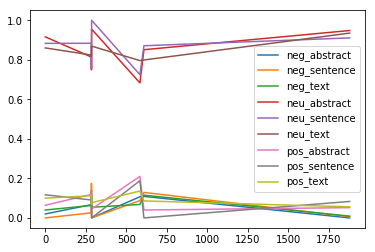

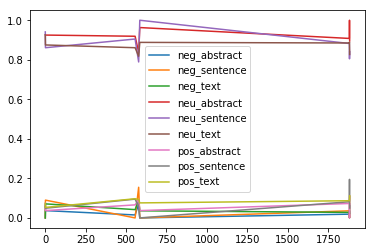

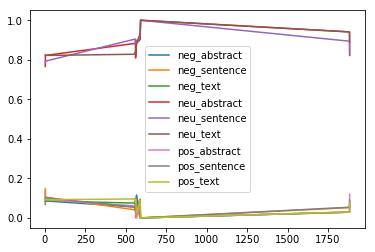

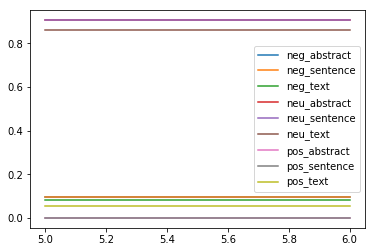

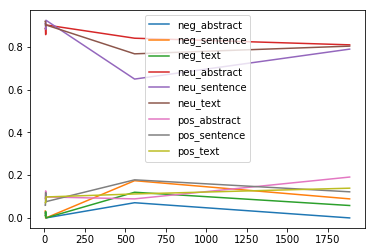

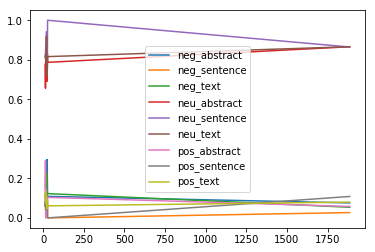

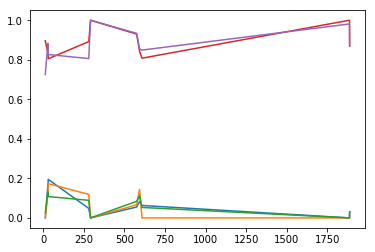

In [61]:
pd_fb = company_dict['facebook']
print(len(pd_fb))
#print(pd_fb.to_string())
#print(pd_fb.groupby('date').mean().to_string())
#pd_fb.groupby('date').plot()
#pd_fb['date'] = pd.to_datetime(pd_fb['date'])
#mask = (pd_fb['date'] > '2018-3-19') & (pd_fb['date'] <= '2018-4-1')
#print(pd_fb.loc[mask]['abstract'].to_string())